# Тема: Простейшая модель гликолиза (уравнения Дж. Хиггинса). 

Простейшая модель гликолиза описывается уравнениями следующего
вида:
$$ \begin{cases}
\dot{y_1} = 1 - y_1y_2 \\
\dot{y_2} = \alpha y_2\Bigl(y_1 - \dfrac{1 + \beta}{y_2 + \beta}\Bigr)
\end{cases} $$



В системе $\beta = 10$, $\alpha = 100$, $200$, $400$, $1000.$
Начальные условия для системы: $y_1(0) = 1, y_2(0) = 0,001, T_k = 50.$ 

Решение этой системы — релаксационные автоколебания (жесткий предельный цикл).

Известно, что в таких случаях (когда имеем дело с релаксационными колебаниями) удобно использовать методы невысокого порядка аппроксимации. В данном случае неплохо подойдет неявный метод Эйлера (имеющий, как известно, первый порядок аппроксимации). 


# Неявный метод Эйлера


Начну с небольшого теоретического введения. Рассмотрим сперва явный метод Эйлера. 

Пусть дана задача Коши для уравнения первого порядка: $$\frac{dy}{dx} = f(x;y)$$
$$ y_{|_{x=x_0}}=y_0, $$

где функция $f$ определена на некоторой области $\displaystyle D\subset \mathbb {R} ^{2}$. Решение ищется на интервале $ (x_{0},b]$. На этом интервале введем узлы: $x_{0}<x_{1}<\dots <x_{n}\leq b.$

Приближенное решение в узлах ${\displaystyle x_{i}}$, которое обозначим через ${\displaystyle y_{i}}$, определяется по формуле:

$${\displaystyle y_{i}=y_{i-1}+(x_{i}-x_{i-1})f(x_{i-1},y_{i-1}),\quad i=1,2,3,\dots ,n.}$$

Эти формулы непосредственно обобщаются на случай систем обыкновенных дифференциальных уравнений.

Метод Эйлера является методом первого порядка — имеет погрешность на шаге ${\displaystyle O(h^{2})}$   и погрешность в целом ${\displaystyle O(h)}$.

В неявном методе Эйлера мы решаем уравнение:

$$
\dfrac{y_{n+1} - y_n}{h} = f(x_{n+1}, y_{n+1})
$$


Чтобы получить выражение для $y_{n+1}$ в явном виде, разложим функцию в ряд Тейлора:


$$
f(x_{n+1}, y_{n+1}) = f(x_{n+1}, y_n + (y_{n+1} - y_n)) \approx f(x_{n+1}, y_n) + \mathcal{J}_y(x_{n+1}, y_n)(y_{n+1} - y_n)
$$

Выразим $$\begin{pmatrix}
y_1^{n+1} \\
y_2^{n+1} 
\end{pmatrix}$$:

$$
\begin{pmatrix}
y_1^{n+1} \\
y_2^{n+1} 
\end{pmatrix} =
\begin{pmatrix}
y_1^n \\
y_2^n 
\end{pmatrix} +
\begin{pmatrix}
\dfrac{1 - y_1^ny_2^n}{\frac{1}{h} - \mathcal{J}_y(x_{n+1}, y^n)} \\
\dfrac{\alpha y_2^n\Bigl(y_1^n - \dfrac{1 + \beta}{y_2^n + \beta}\Bigr)}{\frac{1}{h} - \mathcal{J}_y(x_{n+1}, y^n)}
\end{pmatrix}
$$

Как видно, в выражении используется якобиан $f$. Выпишем его в явном виде: 
$$
\mathcal{J}_y = 
\det\begin{pmatrix}
\dfrac{\partial f_1}{\partial y_1} & \dfrac{\partial f_1}{\partial y_2}\\
\dfrac{\partial f_2}{\partial y_1} & \dfrac{\partial f_2}{\partial y_2}
\end{pmatrix} = \dfrac{\partial f_1}{\partial y_1} \cdot \dfrac{\partial f_2}{\partial y_2} -  \dfrac{\partial f_1}{\partial y_2} \cdot \dfrac{\partial f_2}{\partial y_1}
$$

В нашем случае якобиан будет следующего вида:

$$
\det\begin{pmatrix}
-y_2^n &  & -y_1^n\\
\\
\alpha y_2^n & & \alpha y_1^n - \dfrac{\alpha\beta(1 + \beta)}{(y_2^n + \beta)^2}
\end{pmatrix}
$$

## Приступим к реализации

In [3]:
#импортируем нужные библиотеки
%matplotlib inline
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib as mpl
from matplotlib import pyplot as plt

In [5]:
#определим функцию, вычисляющую якобиан заданной функции
#всё достаточно тривиально, ведь якобиан есть всего лишь детерминант матрицы с заданными значениями
#реализуем немного "колхозно", но на суть это не влияет.
def Jacobian(i, a):  # i=0..(N-1)
    J = np.ndarray(shape=(2,2), dtype=float)
    J[0][0] = -y[i][1]
    J[0][1] = -y[i][0]
    J[1][0] = a * y[i][1]
    J[1][1] = a * y[i][0] - (a * (1 + b) * b) / (y[i][1] + b)**2
    return np.linalg.det(J)


In [6]:
#как можно было заметить, в якобиане подставляются значения y_i и они не подаются на вход функции, зададим их здесь
def new_y1(y, i, a):  # i=0..(N-1)
    return y[i][0] + (1 - y[i][0] * y[i][1]) / (1/h - Jacobian(i, a))

def new_y2(y, i, a):  # i=1..N
    return y[i][1] + a * y[i][1] * (y[i][0] - (1 + b) / (y[i][1] + b)) / (1/h - Jacobian(i, a))

In [8]:
b = 10
a_list = [100, 200, 400, 1000]
h_list = [0.001, 0.001, 0.0001, 0.0001]
T = 50

y_initial = [[1, 0.001]]
params = tuple(zip(a_list, h_list))
y1_list = []
y2_list = []
x_list = []
for a, h in params:
    print(f'alpha = {a};    h = {h}')    
    
    x = np.arange(0, T + 1, h)
    
    y = y_initial[:]

    for i in range(len(x) - 1):
        y.append([new_y1(y, i, a), new_y2(y, i, a)])
        

    y1 = np.array(y).flatten()[::2]
    y2 = np.array(y).flatten()[1::2]
    x_list.append(x)
    y1_list.append(y1)
    y2_list.append(y2)

alpha = 100;    h = 0.001
alpha = 200;    h = 0.001
alpha = 400;    h = 0.0001
alpha = 1000;    h = 0.0001


In [21]:
#функция для построения графиков
def builtGraphs(axes, i, j, x, y):
    if(i == 0):
        if(j == 0):
            axes[i, j].set_title('$y_1(x)$', fontsize=17)
            axes[i, j].set_ylabel('$alpha = 100$', fontsize=17)            
        if(j == 1):
            axes[i, j].set_title('$y_2(x)$', fontsize=17)
        if(j == 2):
            axes[i, j].set_title('Фазовые траектории  $y_2(y_1)$', fontsize=17)
    if(i == 1 and j == 0):
        axes[i, j].set_ylabel('$alpha = 200$', fontsize=17)
    if(i == 2 and j == 0):
        axes[i, j].set_ylabel('$alpha = 400$', fontsize=17)
    if(i == 3 and j == 0):
        axes[i, j].set_ylabel('$alpha = 1000$', fontsize=17)
    
    axes[i, j].plot(x, y)

# Посмотрим на графики

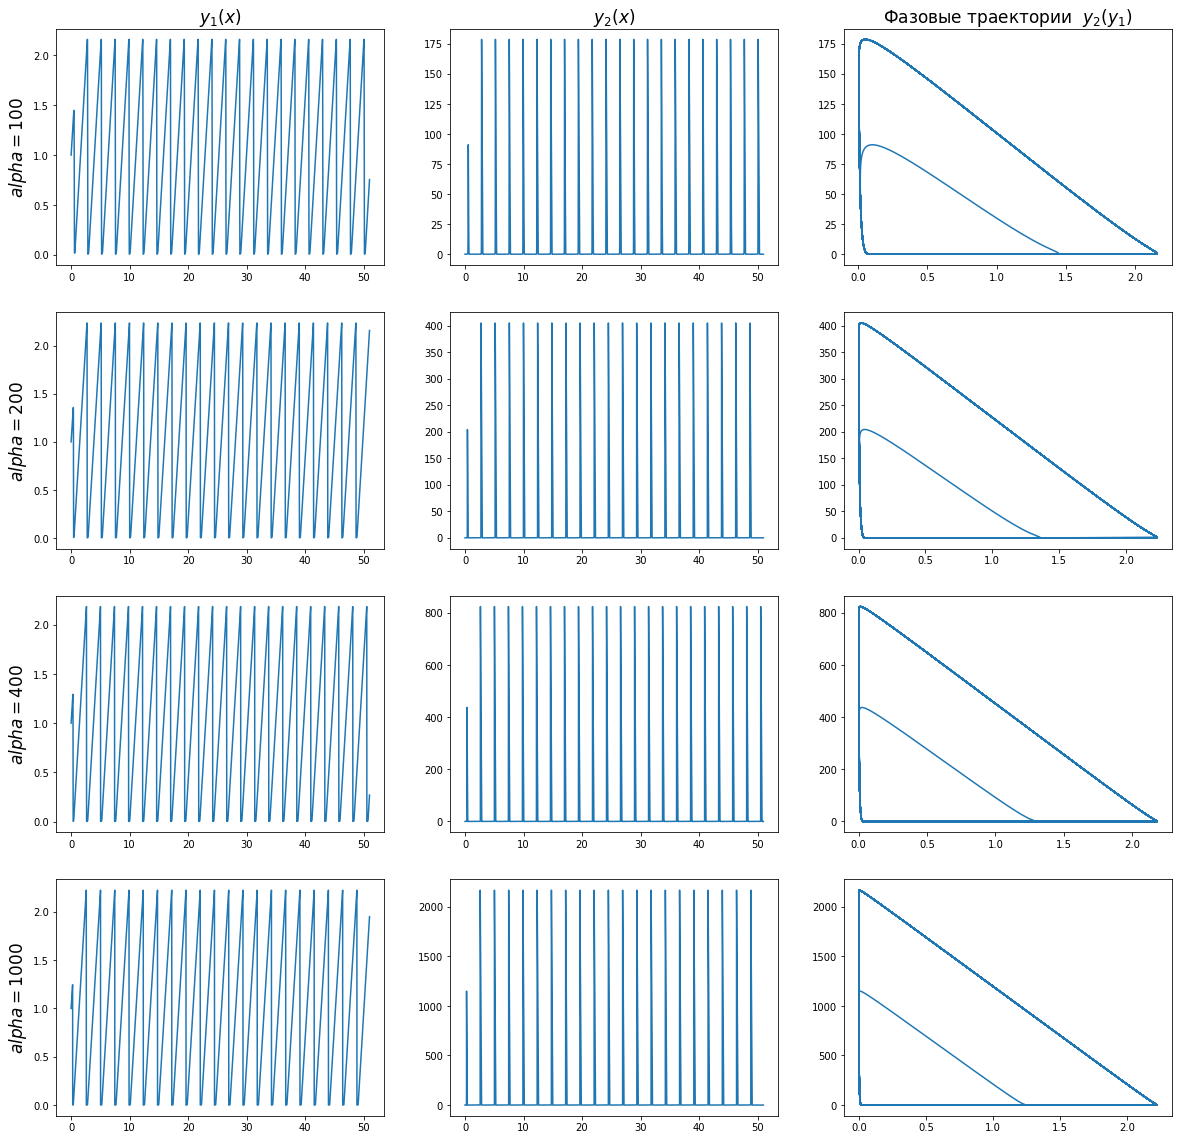

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

builtGraphs(axes, 0, 0, x_list[0], y1_list[0])
builtGraphs(axes, 0, 1, x_list[0], y2_list[0])
builtGraphs(axes, 0, 2, y1_list[0], y2_list[0])

builtGraphs(axes, 1, 0, x_list[1], y1_list[1])
builtGraphs(axes, 1, 1, x_list[1], y2_list[1])
builtGraphs(axes, 1, 2, y1_list[1], y2_list[1])

builtGraphs(axes, 2, 0, x_list[2], y1_list[2])
builtGraphs(axes, 2, 1, x_list[2], y2_list[2])
builtGraphs(axes, 2, 2, y1_list[2], y2_list[2])

builtGraphs(axes, 3, 0, x_list[3], y1_list[3])
builtGraphs(axes, 3, 1, x_list[3], y2_list[3])
builtGraphs(axes, 3, 2, y1_list[3], y2_list[3])

# Рассмотрим на затухающие колебания

### Положим $\alpha = 5$, $\beta = 5$.

In [29]:
a = 5
b = 5

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

In [30]:
def builtGraphs2(axes, i, x, y):    
    if(i == 0):
        axes[i].set_title('$y_1(x)$', fontsize=17)         
    if(i == 1):
        axes[i].set_title('$y_2(x)$', fontsize=17)
    if(i == 2):
        axes[i].set_title('Фазовые траектории  $y_2(y_1)$', fontsize=17)    
    axes[i].grid()
    axes[i].plot(x, y)

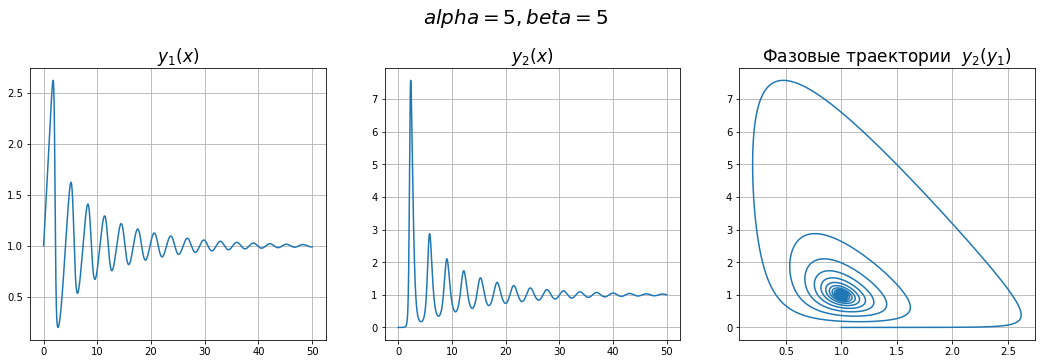

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('$alpha = 5,  beta = 5$', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

# Теперь изменим значения: $\alpha = 10, \beta = 10$.

In [32]:
a = 10
b = 10

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

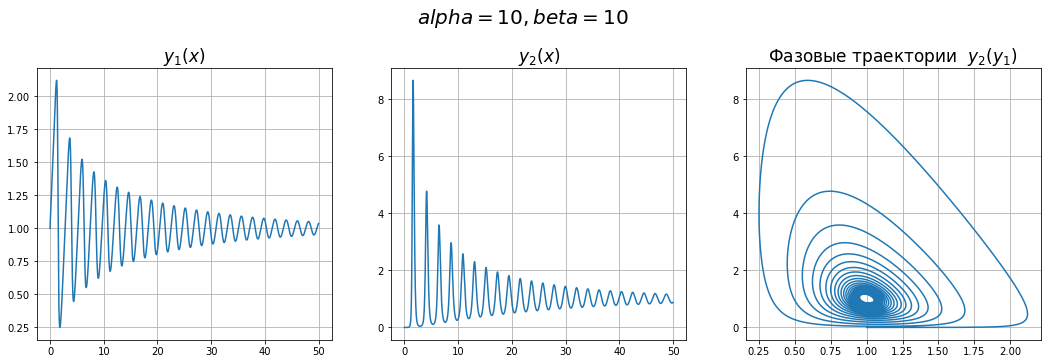

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('$alpha = 10,  beta = 10$', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

# Положим $\alpha = 25, \beta = 25$.

In [34]:
a = 25
b = 25

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

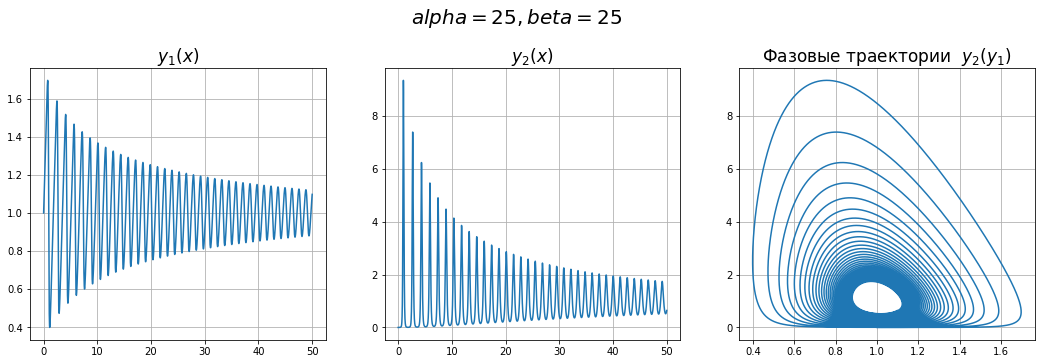

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('$alpha = 25,  beta = 25$', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

# Положим $\alpha = 10, \beta = 100$.

In [36]:
a = 10
b = 100

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

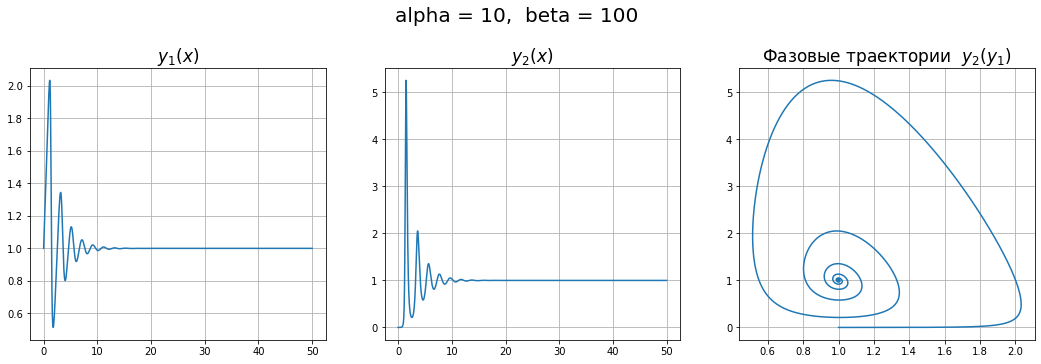

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 10,  beta = 100', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

 # Положим's $\alpha = 100, \beta = 1000$.

In [ ]:
a = 100
b = 1000

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 100,  beta = 1000', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)